In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
def genData(n):
    print("Total number of data points generated",n)
    for i in range(n):
        X1.append(random.uniform(0,1))
        Y1.append(random.uniform(0,1))
        X2.append(random.uniform(-1,0))
        Y2.append(random.uniform(-1,0))
        #label the data
    data1 = [np.array([1,X1[i],Y1[i],1]) for i in range(n)]
    data2 = [np.array([1,X2[i],Y2[i],-1]) for i in range(n)]
    data = data1 + data2
    return data

In [6]:
def calculateOutput(point,w):
    sum = point[1:3]@w[1:] + w[0]
    if sum >= 0:
        return 1
    else: return -1

Total number of data points generated 1000
Initial weights before convergence [1. 1. 1.]
Total number of iterations performed:  9
Final weights after convergence [0.04239116 1.29227366 1.34096571]


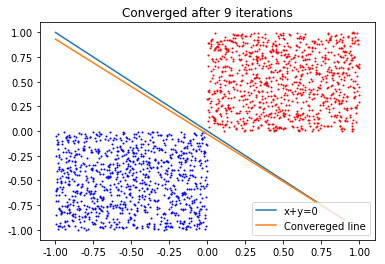

In [21]:
X1 = []
Y1 = []
X2 = []
Y2 = []

iteration=0
w = np.ones(3)
flag=False
maxIterations=1000
learningRate = 0.1
data = genData(1000)

print("Initial weights before convergence", w)
while flag==False and iteration<maxIterations:
    iteration+=1
    for point in data:
        if calculateOutput(point,w)!=point[-1]:
            w = w + (w * point[0:3] * learningRate * point[-1])
            flag=True
    flag = not flag    

print("Total number of iterations performed: ",iteration)        
print("Final weights after convergence", w)

plt.scatter(X1,Y1,c = 'red',s = 1)
plt.scatter(X2,Y2,c = 'blue',s = 1)

#Definging the target function as x+y=0
x_target = np.arange(-1,1,0.1)
y_target = - x_target

#Plotting line of target function
plt.plot(x_target,y_target,label = "x+y=0")

#Plotting converged line
x_conv = np.arange(-1,1,0.1)
y_conv = []
for i in range(0,len(x_conv)):
    y_conv.append(((x_conv[i]*w[1]) + w[0]) / -w[2])
plt.plot(x_conv,y_conv,label = "Convereged line")

plt.title(u"Converged after "+str(iteration)+u" iterations")
plt.legend()
plt.show()